## PHYS 249 Assignment 2:  Comparing Numerical Integration Techniques

(Based on Newman question 5.7/5.8 - see Chapter 5 of the text for details)

**2.1)** (based on Newman 5.7a) Consider the integral

$$I = \int^1_0 sin^2\sqrt{100x}\,dx\,.$$
We are going to try evaluating this integral, but first, plot the integrand over the interval [0,1] to see how it behaves.

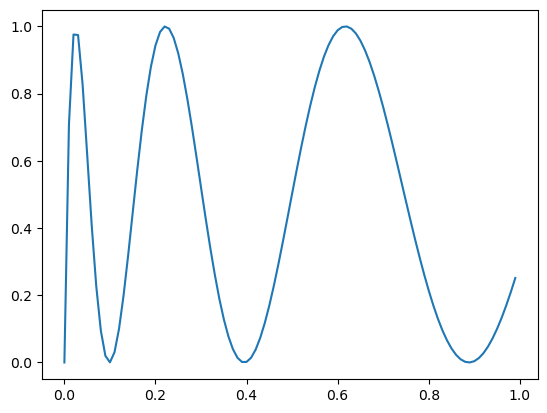

In [5]:
from matplotlib.pyplot import plot, show
from numpy import arange, sin, sqrt

def f(x):
    return (sin(sqrt(100*x)))**2

x = arange(0.0, 1.0, 0.01)
y = f(x)
plot(x, y)
show()



**2.2)** Now write a user-defined function to calculate $I$ using the trapezoid rule, given a number N slices to use. (Your function can also take the upper and lower limits of the integral as arguments, if you like.)

Then, using your function:

– start with $N = 1$ slice, then use $N = 2$, then $N = 4$ etc., doubling the number of slices used until the estimated relative accuracy is approximately $\epsilon = 10^{−6}$ or less, i.e. the answer is correct to six digits after the decimal point.

[Note you can estimate the accuracy in each step by assuming it is roughly the value at that step minus the value at the previous step. This is clearly closer to the accuracy of the **previous** step, but we will ignore this complication here.]

– print out, for each step, the number of slices $N$, the estimate of $I$, and the estimate of the accuracy $\epsilon$. You should find a final value for $I$ close to 0.45.


Also, we will want to plot the errors later on, so save them for later. An easy way to do this is to start an empty list for $N$ and one for the errors, and append to each list every time you change $N$. 

In [2]:
from numpy import sin, arange,sqrt,log10
x1=[]
y1=[]
def f(x):
    return (sin(sqrt(100 * x)))**2

def trapezoid_rule(f, a, b, N):
    h = (b-a) /N
    x = arange(a,b+h,h)
    integral = (h/2)*(f(a)+2*sum(f(x[1:N]))+f(b))
    return integral

true_val=0.45583251071780506
rel_accuracy = 10**-6

N = 1
a = 0.0
b = 1.0


prev_result = trapezoid_rule(f, a, b, N)
accuracy = abs(prev_result - true_val)

while accuracy > rel_accuracy:
    N *= 2
    I = trapezoid_rule(f, a, b, N)
    accuracy = abs(I - true_val)
    prev_result = I
    x1.append(log10(N))
    y1.append(log10(accuracy))
    print( "I is " +"=", I,"with N =",N,"with 𝜖=",accuracy)
print(x1,y1)

I is = 0.3252319078064746 with N = 2 with 𝜖= 0.13060060291133047
I is = 0.5122828507233315 with N = 4 with 𝜖= 0.0564503400055264
I is = 0.40299744847824825 with N = 8 with 𝜖= 0.05283506223955681
I is = 0.43010336929474696 with N = 16 with 𝜖= 0.0257291414230581
I is = 0.4484146657874698 with N = 32 with 𝜖= 0.00741784493033526
I is = 0.45391293121537596 with N = 64 with 𝜖= 0.001919579502429103
I is = 0.45534850437280205 with N = 128 with 𝜖= 0.00048400634500300743
I is = 0.45571126645324095 with N = 256 with 𝜖= 0.00012124426456411319
I is = 0.4558021996516643 with N = 512 with 𝜖= 3.031106614076462e-05
I is = 0.4558249481324199 with N = 1024 with 𝜖= 7.562585385145759e-06
I is = 0.4558306362016465 with N = 2048 with 𝜖= 1.8745161585731474e-06
I is = 0.45583205827827056 with N = 4096 with 𝜖= 4.524395345040233e-07
[0.3010299956639812, 0.6020599913279624, 0.9030899869919435, 1.2041199826559248, 1.505149978319906, 1.806179973983887, 2.1072099696478683, 2.4082399653118496, 2.709269960975831, 3.01

**2.3)** (based on Newman 7.8) Repeat **2.2** using Simpson’s rule (starting with two slices, since this is the minimum required in this case.)

In [3]:
x2=[]
y2=[]
def simpsons_rule(f, a, b, N):
    h = (b - a) / N
    x = arange(a, b + h, h)
    integral = (h/3)*(f(a) + 4 * sum(f(x[1:N:2])) + 2 * sum(f(x[2:N-1:2])) + f(b))
    return integral

true_val = 0.45583251071780506
rel_accuracy = 1e-6

N = 2 
a = 0.0
b = 1.0

prev_result = simpsons_rule(f, a, b, N)
accuracy = abs(prev_result - true_val)
while accuracy > rel_accuracy:
    N *= 2
    I = simpsons_rule(f, a, b, N)
    accuracy = abs(I - true_val)
    prev_result = I
    x2.append(log10(N))
    y2.append(log10(accuracy))


    print("I is =", I, "with N =", N, "with 𝜖 =", accuracy)

I is = 0.5746331650289502 with N = 4 with 𝜖 = 0.11880065431114517
I is = 0.36656898106322056 with N = 8 with 𝜖 = 0.0892635296545845
I is = 0.4391386762335799 with N = 16 with 𝜖 = 0.01669383448422518
I is = 0.4545184312850443 with N = 32 with 𝜖 = 0.0013140794327607397
I is = 0.45574568635801105 with N = 64 with 𝜖 = 8.682435979401326e-05
I is = 0.45582702875861086 with N = 128 with 𝜖 = 5.481959194197916e-06
I is = 0.45583218714672064 with N = 256 with 𝜖 = 3.2357108442626625e-07


**2.4)** Plot $\log(|\epsilon|)$ versus $\log(N)$ for the two methods, together on a single plot. 

What do you conclude - which is the fastest way of reaching the required accuracy?

Also comment on the rate at which the error varies with $N$ in the two cases. Is it what you expect?

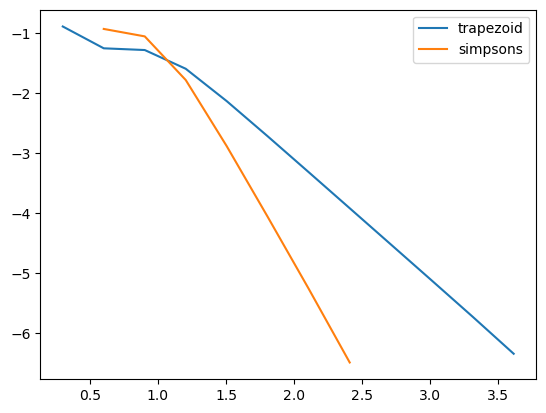

In [30]:
from matplotlib.pyplot import plot,show,legend
plot(x1,y1, label = 'trapezoid')
plot(x2,y2, label = 'simpsons')
legend()
show()